# Importing Libraries & Data Reading

Problem Statement: Use decision tree and random forest to classify whether the cancer is benign or malignant.
Give a detailed comparative analysis

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_curve
from sklearn.model_selection import train_test_split

SEED=10
random.seed(SEED)

pd.set_option('display.max_columns', None)

FILE_PATH = 'Dataset/Cancer.csv'
TEST_SIZE = 0.25

In [35]:
df=pd.read_csv(FILE_PATH) # Read the dataset

# Exploratory Data Analysis

In [36]:
df.shape

(569, 31)

In [37]:
df.head(10)

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
5,B,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,0.2636,0.7294,1.848,19.870,0.005488,0.014270,0.02322,0.005660,0.01428,0.002422,13.760,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
6,B,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,0.2338,1.3530,1.735,20.200,0.004455,0.013820,0.02095,0.011840,0.01641,0.001956,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
7,B,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,0.4062,1.2100,2.635,28.470,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.980,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
8,B,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,0.1872,0.9234,1.449,14.550,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.670,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025
9,B,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,0.2273,0.6329,1.520,17.470,0.007210,0.008380,0.01311,0.008000,0.01996,0.002635,13.100,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408


In [38]:
df.dtypes

Diagnosis                     object
Radius (mean)                float64
Texture (mean)               float64
Perimeter (mean)             float64
Area (mean)                  float64
Smoothness (mean)            float64
Compactness (mean)           float64
Concavity (mean)             float64
Concave points (mean)        float64
Symmetry (mean)              float64
Fractal dimension (mean)     float64
Radius (se)                  float64
Texture (se)                 float64
Perimeter (se)               float64
Area (se)                    float64
Smoothness (se)              float64
Compactness (se)             float64
Concavity (se)               float64
Concave points (se)          float64
Symmetry (se)                float64
Fractal dimension (se)       float64
Radius (worst)               float64
Texture (worst)              float64
Perimeter (worst)            float64
Area (worst)                 float64
Smoothness (worst)           float64
Compactness (worst)          float64
C

Every Input column is of type float64 except the output column which is of type object

In [39]:
df.isnull().sum() 

Diagnosis                    0
Radius (mean)                0
Texture (mean)               0
Perimeter (mean)             0
Area (mean)                  0
Smoothness (mean)            0
Compactness (mean)           0
Concavity (mean)             0
Concave points (mean)        0
Symmetry (mean)              0
Fractal dimension (mean)     0
Radius (se)                  0
Texture (se)                 0
Perimeter (se)               0
Area (se)                    0
Smoothness (se)              0
Compactness (se)             0
Concavity (se)               0
Concave points (se)          0
Symmetry (se)                0
Fractal dimension (se)       0
Radius (worst)               0
Texture (worst)              0
Perimeter (worst)            0
Area (worst)                 0
Smoothness (worst)           0
Compactness (worst)          0
Concavity (worst)            0
Concave points (worst)       0
Symmetry (worst)             0
Fractal dimension (worst)    0
dtype: int64

No null values are present in dataset. No need of dropping any data point

In [40]:
df['Diagnosis']=df['Diagnosis'].map({'M':1,'B':0}) # Mapping the target variable to binary

In [41]:
df.head(10)

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,0,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,0,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,0,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,0,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
5,0,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,0.2636,0.7294,1.848,19.870,0.005488,0.014270,0.02322,0.005660,0.01428,0.002422,13.760,20.70,89.88,582.6,0.14940,0.21560,0.30500,0.06548,0.2747,0.08301
6,0,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,0.2338,1.3530,1.735,20.200,0.004455,0.013820,0.02095,0.011840,0.01641,0.001956,15.150,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
7,0,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,0.4062,1.2100,2.635,28.470,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.980,25.72,82.98,516.5,0.10850,0.08615,0.05523,0.03715,0.2433,0.06563
8,0,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,0.1872,0.9234,1.449,14.550,0.004477,0.011770,0.01079,0.007956,0.01325,0.002551,14.670,23.19,96.08,656.7,0.10890,0.15820,0.10500,0.08586,0.2346,0.08025
9,0,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,0.2273,0.6329,1.520,17.470,0.007210,0.008380,0.01311,0.008000,0.01996,0.002635,13.100,21.33,83.67,527.2,0.11440,0.08906,0.09203,0.06296,0.2785,0.07408


In [42]:
df.describe()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),Fractal dimension (mean),Radius (se),Texture (se),Perimeter (se),Area (se),Smoothness (se),Compactness (se),Concavity (se),Concave points (se),Symmetry (se),Fractal dimension (se),Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


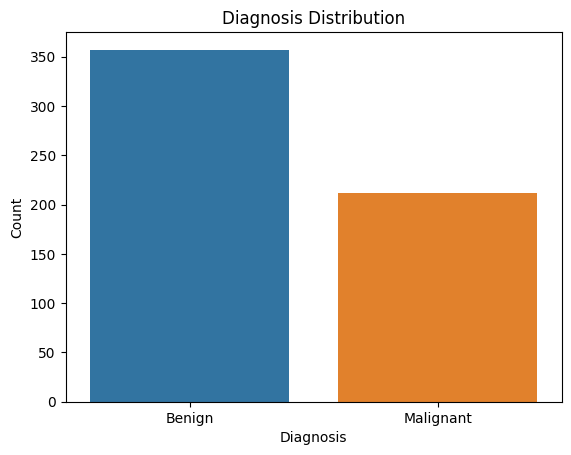

In [43]:
sns.countplot(x='Diagnosis',data=df)
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0,1],['Benign','Malignant'])
plt.show()

Scale of the data is not uniform across the columns and Output class is also not uniformly distributed

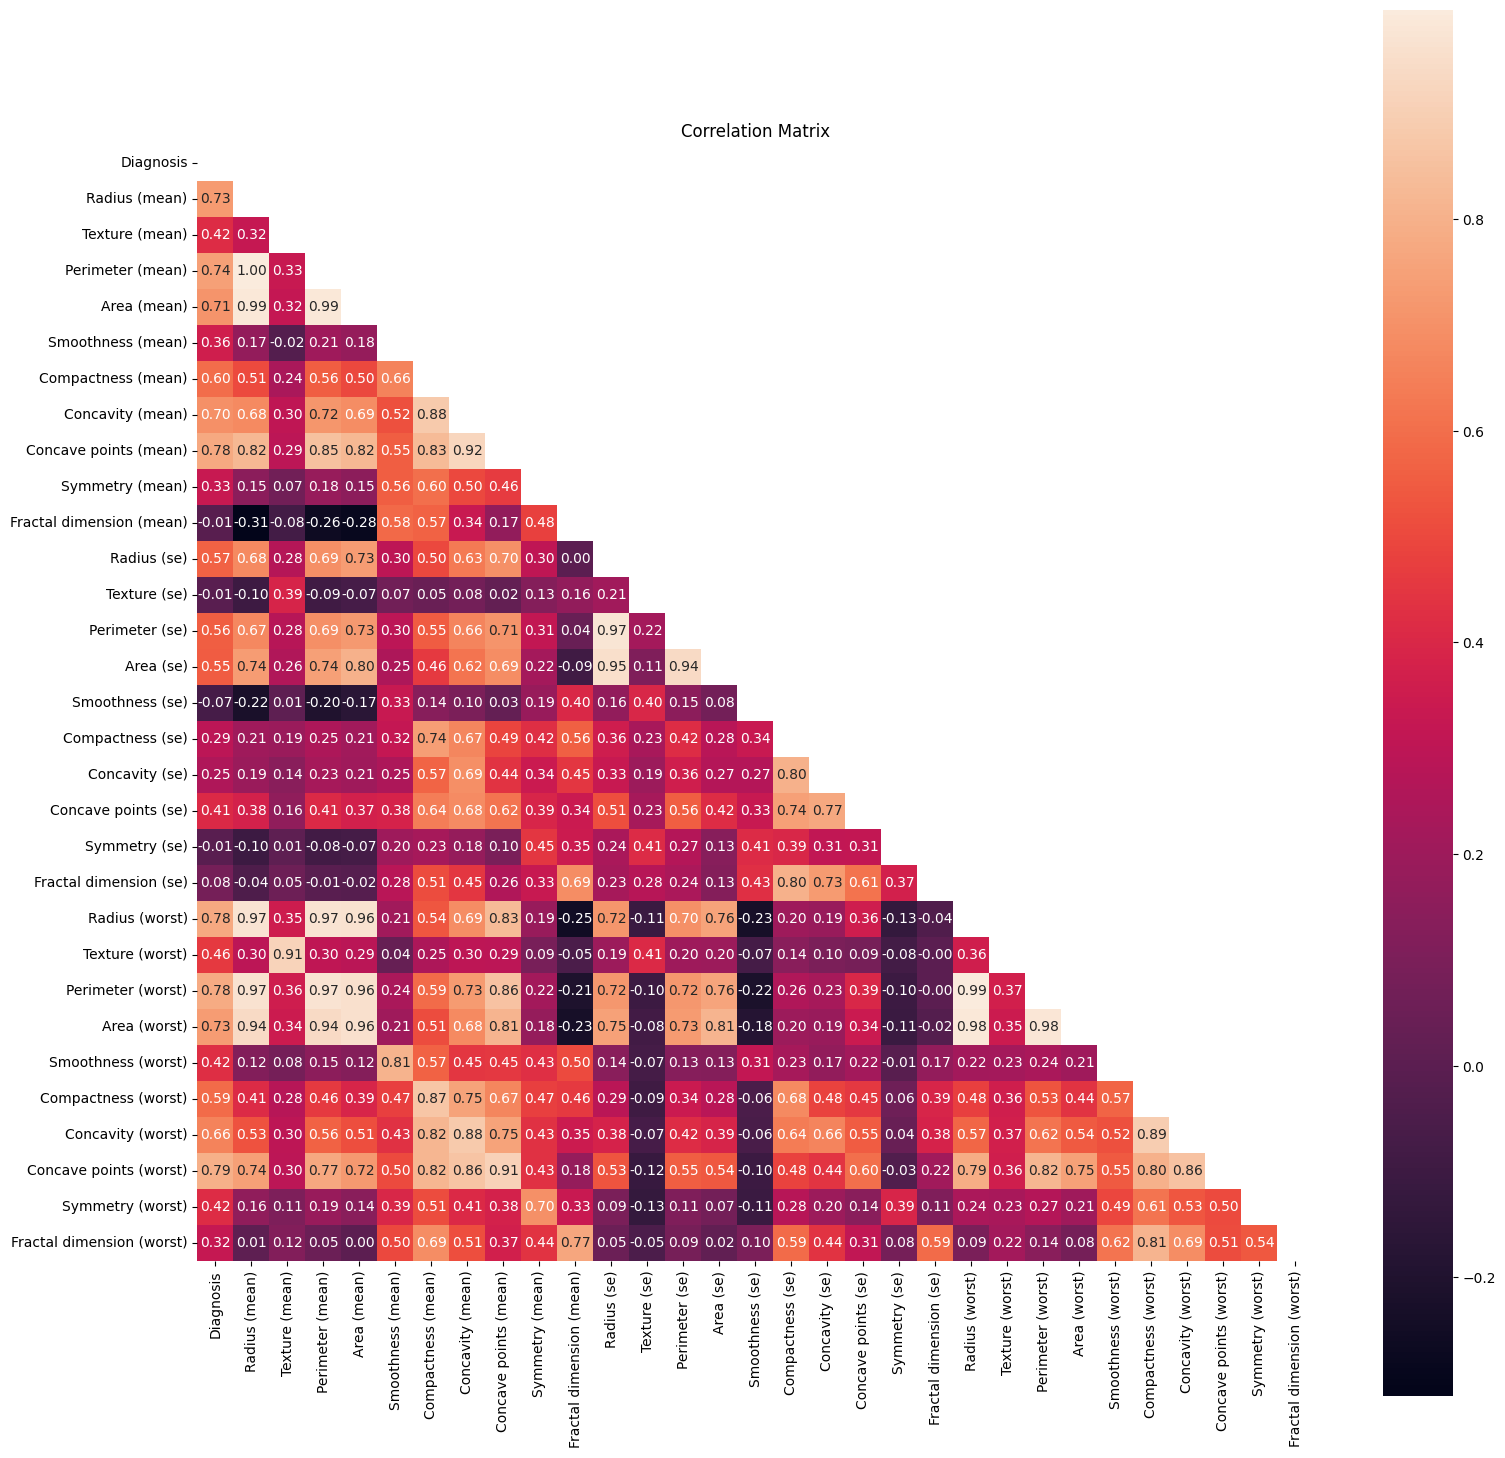

In [44]:
corr = df.corr()
plt.figure(figsize=(18,18))
mask_cells=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask_cells, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
           xticklabels= corr.columns.values,yticklabels= corr.columns.values)
plt.title('Correlation Matrix')
plt.show()



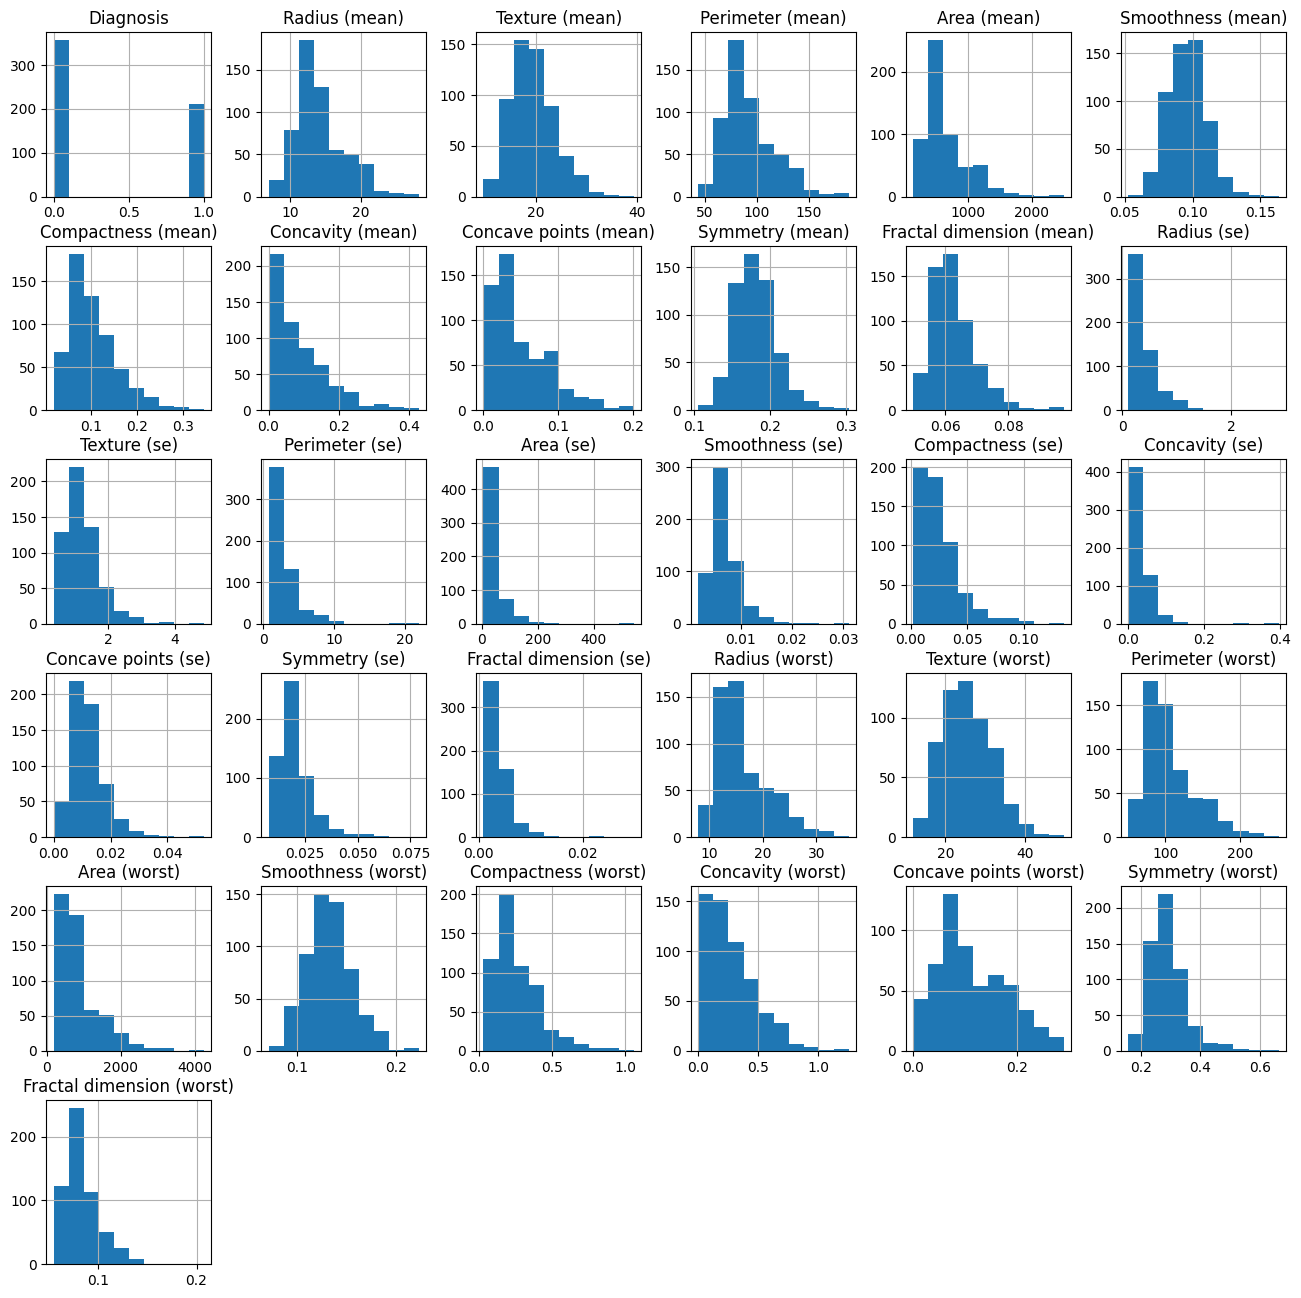

In [45]:
df.hist(figsize=(16,16))
plt.title('Histograms of Features')
plt.show()

Many features are highly correlated with each other like radius to area and perimeter etc.
Also data distribution in columns is skewed to left or normal

Splitting the dataset into training and testing and resetting the index of dataframes.

In [46]:

y=df['Diagnosis']
X = df.drop(['Diagnosis'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,random_state=SEED)


In [47]:
X_train=X_train.reset_index(drop=True)
X_test=X_test.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
y_test=y_test.reset_index(drop=True)

The below steps are for just checking the variation present in dataset.Number of columns in this dataset is small and Decision tree & Random forest are not affected by feature correlation. Performing dimensinality reduction is not required here.  

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [49]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

PCA()

Below is cumalative variance ration explained for PC1 onwards.

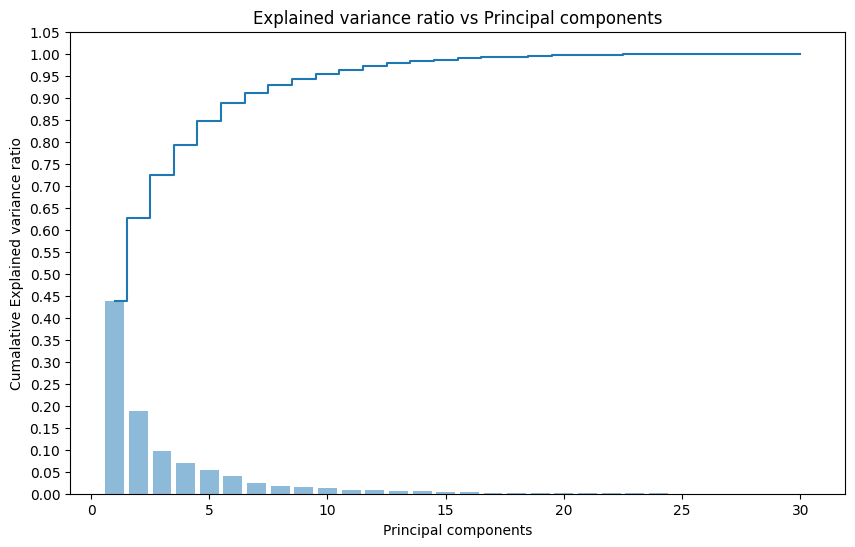

In [50]:
plt.figure(figsize=(10,6))
plt.bar(range(1,X.shape[1]+1),pca.explained_variance_ratio_,alpha=0.5,align='center')
plt.step(range(1,X.shape[1]+1),np.cumsum(pca.explained_variance_ratio_),where='mid')
plt.ylabel('Cumalative Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Explained variance ratio vs Principal components')
plt.yticks(np.arange(0,1.1,0.05))
plt.show()


The below cells are just only for data visualization

In [51]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [52]:
columns_name=['PC1','PC2']
X_train_pca=pd.DataFrame(X_train_pca,columns=columns_name)
X_test_pca=pd.DataFrame(X_test_pca,columns=columns_name)

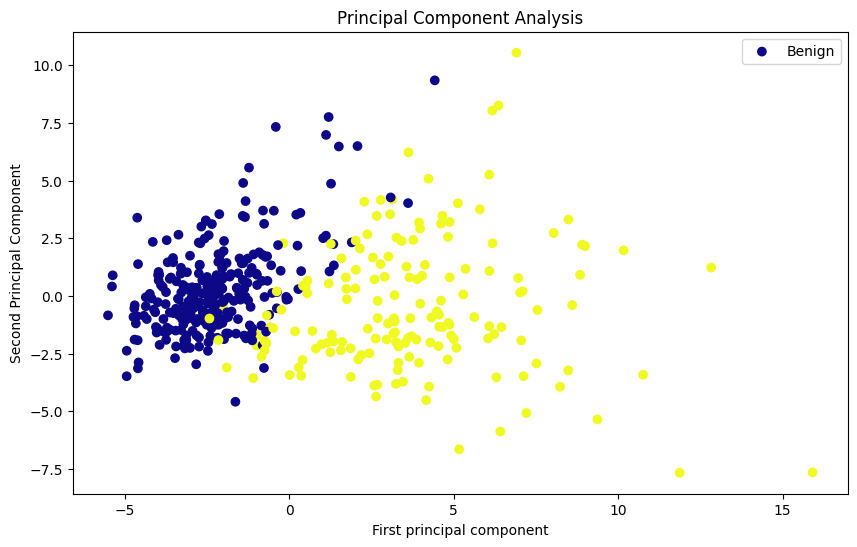

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(X_train_pca['PC1'],X_train_pca['PC2'],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.title('Principal Component Analysis')
plt.legend(['Benign','Malignant'])
plt.show()


# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=SEED)

We are using GridSearchCV which will find optimal hyperparameters for Decision Tree 
It also include the feature of cross validation via argument cv below

Since dataset is not a big dataset, I have set max_depth, min_samples_leaf, min_samples_split in [4,7)

In [55]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': range(4,7),
    'min_samples_leaf':range(4,7),
    'min_samples_split':range(4,7),
    'criterion':['gini','entropy']
}

grid_search_dt = GridSearchCV(estimator=dt,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

Fit function in GridSearchCV will fit using the best model parameters

In [56]:
grid_search_dt.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 7),
                         'min_samples_leaf': range(4, 7),
                         'min_samples_split': range(4, 7)},
             verbose=1)

In [57]:
optimal_dt = grid_search_dt.best_estimator_

In [58]:
optimal_dt

DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=4,
                       random_state=10)

In [59]:
y_pred_dt = optimal_dt.predict(X_test)

In [60]:
cm = confusion_matrix(y_test,y_pred_dt)

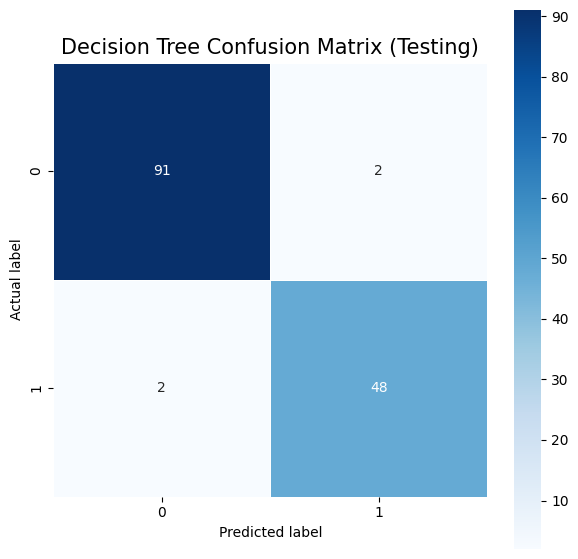

In [61]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Decision Tree Confusion Matrix (Testing)', size = 15)
plt.show()

In [62]:
y_pred_dt_train = optimal_dt.predict(X_train)

In [63]:
print("Accuracy score of Decision Tree (Training): ",accuracy_score(y_train,y_pred_dt_train))
print("F1 score of Decision Tree is: (Training)",f1_score(y_train,y_pred_dt_train))
print()
print("Accuracy score of Decision Tree (Testing): ",accuracy_score(y_test,y_pred_dt))
print("F1 score of Decision Tree is: (Testing)",f1_score(y_test,y_pred_dt))

Accuracy score of Decision Tree (Training):  0.9694835680751174
F1 score of Decision Tree is: (Training) 0.9595015576323987

Accuracy score of Decision Tree (Testing):  0.972027972027972
F1 score of Decision Tree is: (Testing) 0.96


# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(random_state=SEED)

Using GridSeachCV in similiar conditions as defined above in Decision Tree

In [65]:
param_grid = {
    'max_depth': range(4,7),
    'min_samples_leaf':range(4,7),
    'min_samples_split':range(4,7),
    'n_estimators':[50,100],
    'criterion':['gini','entropy']
}


grid_search_rf = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=1)

In [66]:
grid_search_rf.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 7),
                         'min_samples_leaf': range(4, 7),
                         'min_samples_split': range(4, 7),
                         'n_estimators': [50, 100]},
             verbose=1)

In [67]:
optimal_rf = grid_search_rf.best_estimator_

In [68]:
optimal_rf

RandomForestClassifier(criterion='entropy', max_depth=6, min_samples_leaf=4,
                       min_samples_split=4, random_state=10)

In [69]:
y_pred_rf=optimal_rf.predict(X_test)

In [70]:
cm=confusion_matrix(y_test,y_pred_rf)

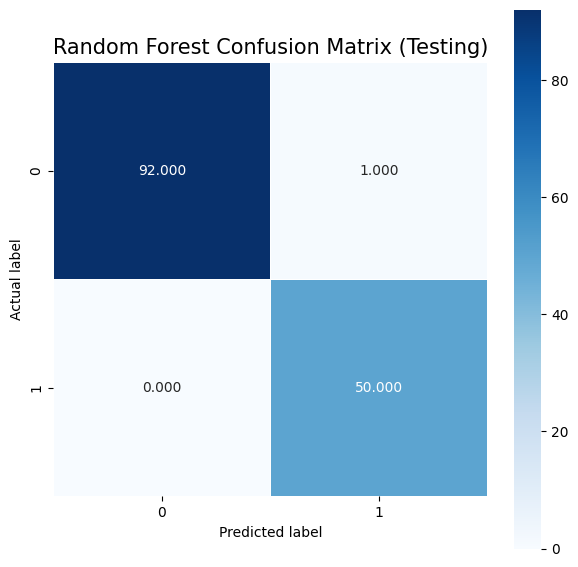

In [71]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Random Forest Confusion Matrix (Testing)', size = 15)
plt.show()

In [72]:
y_pred_rf_train =optimal_rf.predict(X_train)


In [73]:
print("Accuracy score of Random Forest (Training): ",accuracy_score(y_train,y_pred_rf_train))
print("F1 score of Random Forest (Training):",f1_score(y_train,y_pred_rf_train))
print()
print("Accuracy score of Random Forest (Testing): ",accuracy_score(y_test,y_pred_rf))
print("F1 score of Random Forest (Testing): ",f1_score(y_test,y_pred_rf))


Accuracy score of Random Forest (Training):  0.9835680751173709
F1 score of Random Forest (Training): 0.9781931464174456

Accuracy score of Random Forest (Testing):  0.993006993006993
F1 score of Random Forest (Testing):  0.99009900990099


# Comparative Analysis

We are comparing F1 score since that is more effective metrics in imbalanced dataset as given here. 
but even applying for accuracy will result in similiar results also.

Random Forest performs better than Decision Tree in Testing & Training.
I will give results in Random forest vs Decision tree form

Training: 0.978 vs 0.959
Testing: 0.990 vs 0.96